In [913]:
import pandas as pd
import matplotlib.pyplot as plt

### Data Processing

Generate the dataset myself based on the costco laptop information, and upload the dataset to github.

In [914]:
file_name = "https://raw.githubusercontent.com/stephanieli000131/Yale-558-HW3/main/dataset_lxr_computer.csv"
df = pd.read_csv(file_name)


# change price like "1,999" into fload value 1999.00
df['Price'] = df['Price'].str.replace(',', '').astype(float)

Data description and distribution

             Price  Memory_GB  Generation  Hard_drive_size_GB  \
count    35.000000  35.000000   21.000000           35.000000   
mean   1510.560857  17.371429   11.952381          722.285714   
std     792.686590   8.888478    0.384212          354.496874   
min     269.990000   4.000000   11.000000           64.000000   
25%     949.990000  12.000000   12.000000          512.000000   
50%    1399.990000  16.000000   12.000000         1024.000000   
75%    1999.980000  16.000000   12.000000         1024.000000   
max    3449.990000  32.000000   13.000000         1024.000000   

       Screen_size_inch  Screen_resolution  
count         35.000000          35.000000  
mean          15.437143        2251.428571  
std            1.364268         471.781747  
min           13.300000        1600.000000  
25%           14.000000        1920.000000  
50%           15.600000        1920.000000  
75%           16.500000        2560.000000  
max           17.300000        3456.000000  


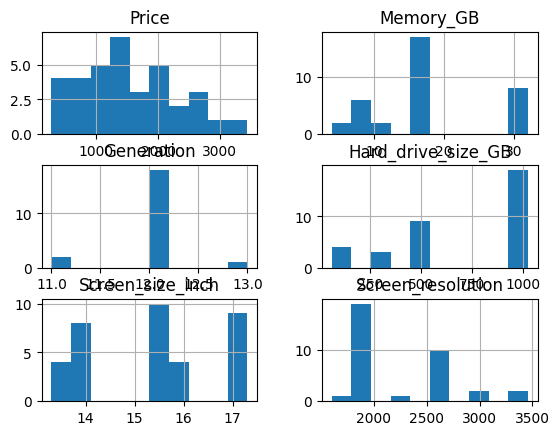

In [915]:
print(df.describe())

df.hist()
plt.show()

In [916]:
df.head(5)

,Brand,Model,Price,Memory_GB,CPU_brand,Generation,Processor_CPU,Graphic_card_GPU,Storage_drive_type,Hard_drive_size_GB,Screen_size_inch,Screen_resolution,Operating_system,Color,Website
0,HP,17-cp1035cl,599.99,12,AMD,NaN,R5,Integrated Graphics,HDD,1024,17.3,1600,Windows,Silver,https://www.costco.com/hp-17.3%22-touchscreen-...
1,Lenovo,82S00003US,1399.99,16,Intel,12.0,i7,NVIDIA GeForce RTX 3050Ti,SSD,512,16.0,2560,Windows,Gray,https://www.costco.com/lenovo-legion-5-pro-16%...
2,ASUS,UX582HM-XH96T,1999.97,32,Intel,11.0,i9,NVIDIA GeForce RTX 3060,SSD,1024,15.6,1920,Windows,Blue,https://www.costco.com/.product.100831583.html
3,LG,15Z90Q-P.AAC8U1,1199.99,16,Intel,12.0,i7,Integrated Graphics,SSD,1024,15.6,1920,Windows,Black,https://www.costco.com/.product.100983985.html
4,HP,17-ch2045cl,1249.99,16,Intel,12.0,i7,NVIDIA GeForce MX550,SSD,1024,17.3,1920,Windows,Silver,https://www.costco.com/.product.100941379.html


### Design Classes


In [917]:
class issue:
    ''' Class for issues '''

    # keep track of each instance of an issue.
    count = 0 # how many issues have we created?
    issues = {} # store the issues in a dictionary, aka, a hash table.

    def __init__(self, name):
        ''' This is the constructor for an issue.  It is invoked with the class name and 
        the name of the issue, e.g., issue("abortion")
        We use the Python string method upper() to convert the name to upper case.
        If the issue is already in the dictionary, we ignore this instance. 
        Otherwise, we add it to the dictionary.
        We assign a sequential count to the instance and increment the class count.
        We stick the new issue in dictionary.'''
        name = str(name)
        self.name = name.upper()
        if self.name not in issue.issues:
            self.count = issue.count
            issue.count += 1
            issue.issues[self.name] = self

    def __repr__(self):
        ''' Print out a representation that evaluates to this issue.'''
        return f'issue({self.name!r})'

    def __str__(self):
        ''' Return string version of the issue that includes its name and count. '''
        return f"<issue ({self.count}): {self.name}>"
    
    def __eq__(self, other):
        ''' Overload == operator. Two issues must match issue name. '''
        return self.name == other.name 

class stance:
    ''' Class for importance and side on a given issue.'''
    count = 0
    stances = []

    def __init__(self, issuename, side='pro', importance='A'):
        ''' Constructor for stance().  If the issuename is not already an issue, 
        create a new issue '''
        self.side = side.upper()

        issuename = str(issuename)
        self.issuename = issuename
        if not issuename.upper() in issue.issues:
            issue(issuename)
        self.issue = issue.issues[issuename.upper()]
        
        self.importance = importance.upper()
        self.count = stance.count
        stance.count += 1
        stance.stances.append(self)
    def get_name(self):
        return self.issuename

    def __repr__(self):
        ''' Print out code that evaluates to this stance.'''
        return f'stance({self.issue.name!r}, {self.side!r}, {self.importance!r})'
    
    def __str__(self):
        ''' Return string version of self '''
        return f"<stance ({self.count}): {self.issue.name} [{self.side}:{self.importance}]>"
    
    def __eq__(self, other):
        ''' Overload == operator. Two stances must match issue and side, 
        though not importance. '''
        # return self.issue == other.issue and self.side == other.side and self.importance == other.importance
        return self.get_name() == other.get_name() and self.side == other.side and self.importance == other.importance

    def copy(self):
        ''' Clone a stance.  New stance has same issue, side, and importance. '''
        return stance(self.issue.name, self.side, self.importance)

    def __hash__(self):
        ''' hash() function for stance. 
        Need this for set() to remove duplicates.   
        Note: do not need to include importance.  Match is on issue and side only. '''
        return hash((self.issue.name, self.side))  

    def __lt__(self, other):
        ''' Comparison operator < to allow sorting stances. '''
        return self.issue.name + self.side < other.issue.name + other.side 
    

    def __ne__(self, other):
        return self.get_name() == other.get_name() and (self.side != other.side or self.importance == other.importance)


In [918]:
## features' class ：a class of features stance
class features:
    def __init__(self, row_df, description):
        self.row_df = row_df
        # store info
        self.Brand = row_df['Brand']
        self.Model = row_df['Model']
        self.Price = row_df["Price"]
        self.Price_level = self.get_level("Price", row_df, description)
        self.Memory_GB = row_df["Memory_GB"]
        self.Memory_GB_level = self.get_level("Memory_GB", row_df, description)
        self.CPU_brand = row_df["CPU_brand"]
        self.CPU_brand_level = row_df['CPU_brand']
        self.Generation = row_df['Generation']
        self.Processor_CPU = row_df['Processor_CPU']
        self.Graphic_card_GPU = row_df['Graphic_card_GPU']
        self.Storage_drive_type = row_df['Storage_drive_type']
        self.Hard_drive_size_GB = row_df['Hard_drive_size_GB']
        self.Hard_drive_size_GB_level = self.get_level("Hard_drive_size_GB", row_df, description)
        self.Screen_size_inch = row_df["Screen_size_inch"]
        self.Screen_size_inch_level = self.get_level("Screen_size_inch", row_df, description)
        self.Screen_resolution = row_df["Screen_resolution"]
        self.Screen_resolution_level = self.get_level("Screen_resolution", row_df, description)
        self.Operating_system = row_df['Operating_system']
        self.Color = row_df['Color']
        self.Website = row_df['Website']

        # list of features 
        self.list_of_features = [self.Brand, self.Model, self.Price, self.Memory_GB, self.CPU_brand, \
                                 self.Generation, self.Processor_CPU, self.Graphic_card_GPU, \
                                 self.Storage_drive_type, self.Hard_drive_size_GB, self.Screen_size_inch, \
                                 self.Screen_resolution, self.Operating_system, self.Color, self.Website]

        self.list_of_level_features = [self.Price_level, self.Memory_GB_level, self.Hard_drive_size_GB_level, \
                                       self.Screen_size_inch_level, self.Screen_resolution_level]

    def get_level(self, name, row_df, description):
        val = row_df[name]
        if name == "Price":
            if val > description[name]["75%"]:
                return stance(name, "PRO", "A")
            elif description[name]["50%"] < val <= description[name]["75%"]:
                return stance(name, "PRO", "B")
            elif description[name]["25%"] < val <= description[name]["50%"]:
                return stance(name, "CON", "C")
            else:
                return stance(name, "CON", "D")

        if val >= description[name]["75%"]:
            return stance(name, "PRO", "A")
        elif description[name]["50%"] <= val < description[name]["75%"]:
            return stance(name, "PRO", "B")
        elif description[name]["25%"] <= val < description[name]["50%"]:
            return stance(name, "CON", "C")
        else:
            return stance(name, "CON", "D")

        

    def __repr__(self):
        # print
        return f'All features information of this device: \n{self.row_df})'



In [919]:
# create a device class, which has instances of a features class. 
class device:
    def __init__(self, row, whole_df = df):
        self.row_df = row
        # features class
        self.device_features = features(row, whole_df.describe())
    
    def get_list_of_value_features(self):
        return self.device_features.list_of_features

    def get_list_of_level_features(self):
        return self.device_features.list_of_level_features

    def __repr__(self):
        # print the valu 
        return f'Device information: \n{self.row_df.to_frame()})'

    def __eq__(self, other):
        ''' Overload == operator. Two stances must match the model number '''
        return self.device_features.Model == other.device_features.Model 
    
    def __lt__(self, other):
        ''' Comparison operator < to allow sorting stances. '''
        return self.device_features.Price < other.device_features.Price

In [920]:
from prompt_toolkit.shortcuts.progress_bar.base import E
class agent:
                                                                  
    '''Class for agents who have goals.'''                                                                                    
                                                                                                                              
    count = 0                                                                                                                 
    agents = []                                                                                                               
                                                                                                                              
    def __init__(self, name='N/A', pronouns='he him his'):                                                                          
        ''' Constructor for agent with name.'''                                                                               
        self.name = name                                                                                                      
        self.pronouns = pronouns                                                                                              
        self.goals = set()                                                                                                     
        self.count = agent.count                                                                                              
        agent.count += 1                                                                                                      
        agent.agents.append(self)                                                                                             
                                                                                                                              
    def __repr__(self):                                                                                                       
        ''' Print out agent so that it can evaluate to itself.'''                                                             
        return f"agent({self.name!r})"                                                                                        
                                                                                                                              
    def __str__(self):                                                                                                        
        '''Return agent as a string.'''                                                                                       
        return f"<agent. name: {self.name} ({self.count})>"                                                                   
                                                                                                                              
    def add_goal(self, goal):                                                                                                 
        '''Add goals (stances) without duplicates.'''   

        # direct
        if isinstance(goal, stance):                                        
            self.goals.add(goal)      

        elif isinstance(goal, str):
            if goal == "Gamming":
                self.goals.add(stance('MEMORY_GB', 'PRO'))
                self.goals.add(stance('SCREEN_SIZE_INCH', 'PRO'))
                self.goals.add(stance('SCREEN_RESOLUTION', 'PRO'))
                self.goals.add("Apple")
            
            elif goal == "Study":
                self.goals.add(stance('MEMORY_GB', 'PRO'))
                self.goals.add(stance('HARD_DRIVE_SIZE_GB', 'PRO'))
    
            # if the goal is "Video production / photography"
            elif goal == "Video production" or goal == "Photography" :
                self.goals.add(stance("is_mac", "PRO", 'A'))
                self.goals.add(stance('MEMORY_GB', 'PRO'))
                self.goals.add(stance('SCREEN_RESOLUTION', 'PRO'))
                self.goals.add(stance('HARD_DRIVE_SIZE_GB', 'PRO'))
                self.goals.add(stance('SCREEN_SIZE_INCH', 'PRO'))
            
            elif goal == "Working" :
                self.goals.add(stance("is_mac", "PRO", 'A'))
                self.goals.add(stance('MEMORY_GB', 'PRO'))
                self.goals.add(stance('SCREEN_SIZE_INCH', 'PRO'))

            elif goal == "Travler":
                self.goals.add(stance('SCREEN_SIZE_INCH', 'CON', "C"))
            
            elif goal == "Extremely Portable":
                self.goals.add(stance('SCREEN_SIZE_INCH', 'CON', "D"))

            elif goal == "High color accuracy":
                self.goals.add(stance("is_mac", "PRO", 'A'))

            elif goal == "2000+":
                self.goals.add(stance("PRICE", "PRO", "A"))

            elif goal == "1400 ~  2000":
                self.goals.add(stance("PRICE", "PRO", "B"))
            
            elif goal == "950 ~ 1400":
                self.goals.add(stance("PRICE", "CON", "C"))
            
            elif goal == "0~ 950":
                self.goals.add(stance("PRICE", "CON", "D"))

            elif goal == "Apple":
                self.goals.add(stance("is_mac", "PRO", 'A'))

            else:
                # if have specific requirement
                # add string
                if goal != " " or goal != "":
                    self.goals.add(goal)
                                                                                               
                                                                                                                              
    def pp(self):                                                                                                             
        '''Pretty print agent information.'''                                                                                 
        result = f"Name:\t{self.name}"                                                                                        
        if self.goals:                                                                                                        
            result += f"\nGoals:\t{self.goals}"
        if self.pronouns:
            result += f"\nPronouns:\t{self.pronouns}"
        return result                                                                                                         
                                                                                                                                 
    def __eq__(self, other):                                                                                                  
        ''' Overload == operator.  Are two agents equal by name and goals? '''                                                
        return self.name == other.name and sorted(self.goals) == sorted(other.goals)                                            
                                                                                                                              
    def copy(self):                                                                                                           
        ''' Clone the agent, including name, and goals. '''                                                                   
        newagent = agent(self.name)                                                                                           
        newagent.goals = self.goals[:]                                                                                        
        return newagent              

In [921]:
def get_all_devices(df):
    all_devices_lst = []
    for idx in range(len(df)):
        # create a device class
        one_device = device(df.iloc[idx])
        all_devices_lst.append(one_device)
    
    return all_devices_lst

In [922]:
def likes(agent, device):
    list_of_value_features = set(device.get_list_of_value_features())
    list_of_level_features = set(device.get_list_of_level_features())
    #obj = list_of_value_features + list_of_level_features

    proresult = set()
    conresult = set()
    for g in agent.goals:
        if isinstance(g, stance):
            for s in list_of_level_features:
                if s == g:
                    proresult.add(g)
                if s != g:
                    conresult.add(g)
        else:
            if g in list_of_value_features:
                proresult.add(g)
            else:
                conresult.add(g)
    if proresult and conresult:
        return ("both",  ['proresult:'] + list(proresult) + ['conresult:'] + list(conresult))
    if proresult:
        return (True, ['proresult:'] + list(proresult))
    if conresult:
        return (False, ['conresult:'] + list(conresult))

    return (False, [])

In [923]:
def prefers(agent, list_of_devices):
    most_recommend = []
    least_recommend = []
    for device in list_of_devices:
        res, reason = likes(agent, device)
        if res == True:
            most_recommend.append((device,reason) )
        elif res == 'both':
            least_recommend.append((device,reason))
    
    if len(most_recommend) == 0:
        most_recommend = ["No device fit all the requirments."]
    return ["Fit all requirments:"] + most_recommend + [" Possible prefer:"] +least_recommend

In [924]:
def recommend(agent):
    # all machines
    list_of_devices = get_all_devices(df)
    return prefers(agent, list_of_devices)

### Start taking survey to define agent’s goal and do computer recommend system

In [925]:
# get all devices information from the dataset csv
all_device = get_all_devices(df)

Design a survey, all questions are optional


In [940]:
from IPython.core.magics.script import script_args
import ipywidgets as widgets

# Create the questions
name_label = widgets.Label("What is your name?")
name_entry = widgets.Text()

pronouns_label = widgets.Label("What are your pronouns?")
pronouns_buttons = widgets.ToggleButtons(
    options=["He/Him/His", "She/Her/Hers"],
    button_style='',
)

purpose_label = widgets.Label("What is your purpose to use the computer?")
purpose_buttons = widgets.ToggleButtons(
    options=["Gamming", "Study", "Video production", "Photography", "Working", "Travler", " "],
    button_style='',
)

portable_label = widgets.Label("Extremely Portable device?")
portable_buttons = widgets.ToggleButtons(
    options=["Yes", "No", " "],
    button_style='',
)

brand_label = widgets.Label("Brand Preference?")
brand_buttons = widgets.ToggleButtons(
    options=['HP', 'Lenovo', 'ASUS', 'LG', 'Acer', 'Apple', 'Dell', 'MSI', 'Alienware', " "],
    button_style='',
)

os_label = widgets.Label("Operating System?")
os_buttons = widgets.ToggleButtons(
    options=["Windows", "Mac", "Chrome", " "],
    button_style='',
)

color_label = widgets.Label("High color accuracy?")
color_buttons = widgets.ToggleButtons(
    options=["Yes", "No", " "],
    button_style='',
)

budget_label = widgets.Label("Budget (Price)?")
budget_buttons = widgets.ToggleButtons(
    options=["0~ 950", "950 ~ 1400","1400 ~  2000", "2000+", " "],
    button_style='',
)


quote = widgets.Label("Specific question below. With importance level, A is the most important" )
mem_label = widgets.Label("Large Memory?")
mem_buttons = widgets.ToggleButtons(
    options=["A", "B","C", "D", " "],
    button_style='',
)

si_label = widgets.Label("Big screen size?")
si_buttons = widgets.ToggleButtons(
    options=["A", "B","C", "D", " "],
    button_style='',
)

reso_label = widgets.Label("High screen resolution?")
reso_buttons = widgets.ToggleButtons(
    options=["A", "B","C", "D", " "],
    button_style='',
)


requirement_label = widgets.Label("Any specific requirement? (For example, want a specific Storage drive type, like SSD/eMMC..., want specific color, like Silver/Black/Gray...)")
requirement_entry = widgets.Textarea()

# Display the questions
display(name_label, name_entry)
display(pronouns_label, pronouns_buttons)
display(purpose_label, purpose_buttons)
display(portable_label, portable_buttons)
display(brand_label, brand_buttons)
display(os_label, os_buttons)
display(color_label, color_buttons)
display(budget_label, budget_buttons)
display(quote)
display(mem_label, mem_buttons)
display(si_label, si_buttons)
display(reso_label, reso_buttons)
display(requirement_label, requirement_entry)

# Create a red "Submit" button
submit_button = widgets.Button(description="Submit", button_style='danger')

# Define a function to handle the button click event
def submit_survey(button):
    global name
    global pronouns
    global purpose
    global portable
    global brand
    global os
    global color
    global budget
    global requirement
    global memory
    global screen_size
    global screen_resolution

    name = name_entry.value
    pronouns = pronouns_buttons.value
    purpose = purpose_buttons.value
    portable = portable_buttons.value
    brand = brand_buttons.value
    os = os_buttons.value
    color = color_buttons.value
    budget = budget_buttons.value
    requirement = requirement_entry.value
    memory = mem_buttons.value
    screen_size = si_buttons.value
    screen_resolution = reso_buttons.value
    print("--------------------------------------------")
    print("Survey results:")
    print(f"Name: {name}")
    print(f"Pronouns: {pronouns}")
    print(f"Purpose: {purpose}")
    print(f"Extremely Portable device?: {portable}")
    print(f"Brand Preference: {brand}")
    print(f"Operating System: {os}")
    print(f"High color accuracy?: {color}")
    print(f"Budget: {budget}")
    print(f"Requirements: {requirement}")
    print(f"memory: {memory}")
    print(f"screen_size: {screen_size}")
    print(f"screen_resolution: {screen_resolution}")
    

# Attach the event handler function to the button click event
submit_button.on_click(submit_survey)

# Display the button
display(submit_button)


Label(value='What is your name?')

Text(value='')

Label(value='What are your pronouns?')

ToggleButtons(options=('He/Him/His', 'She/Her/Hers'), value='He/Him/His')

Label(value='What is your purpose to use the computer?')

ToggleButtons(options=('Gamming', 'Study', 'Video production', 'Photography', 'Working', 'Travler', ' '), valu…

Label(value='Extremely Portable device?')

ToggleButtons(options=('Yes', 'No', ' '), value='Yes')

Label(value='Brand Preference?')

ToggleButtons(options=('HP', 'Lenovo', 'ASUS', 'LG', 'Acer', 'Apple', 'Dell', 'MSI', 'Alienware', ' '), value=…

Label(value='Operating System?')

ToggleButtons(options=('Windows', 'Mac', 'Chrome', ' '), value='Windows')

Label(value='High color accuracy?')

ToggleButtons(options=('Yes', 'No', ' '), value='Yes')

Label(value='Budget (Price)?')

ToggleButtons(options=('0~ 950', '950 ~ 1400', '1400 ~  2000', '2000+', ' '), value='0~ 950')

Label(value='Specific question below. With importance level, A is the most important')

Label(value='Large Memory?')

ToggleButtons(options=('A', 'B', 'C', 'D', ' '), value='A')

Label(value='Big screen size?')

ToggleButtons(options=('A', 'B', 'C', 'D', ' '), value='A')

Label(value='High screen resolution?')

ToggleButtons(options=('A', 'B', 'C', 'D', ' '), value='A')

Label(value='Any specific requirement? (For example, want a specific Storage drive type, like SSD/eMMC..., wan…

Textarea(value='')

Button(button_style='danger', description='Submit', style=ButtonStyle())

--------------------------------------------
Survey results:
Name: Marry
Pronouns: She/Her/Hers
Purpose: Study
Extremely Portable device?: No
Brand Preference: Apple
Operating System: Mac
High color accuracy?: Yes
Budget: 1400 ~  2000
Requirements: SSD
memory:  
screen_size: C
screen_resolution:  


### Get Agent class based on the survey


In [941]:
# create an agent class
a = agent(name, pronouns)


### add goals based on the survy
# general questions
a.add_goal(purpose)
if portable == "Yes":
    a.add_goal("Extremely Portable")
a.add_goal(os)
if color == "Yes":
    a.add_goal('High color accuracy')
a.add_goal(budget)
a.add_goal(requirement)

if memory in ["A","B", "C","D"]:
    if memory in ["A", "B"]:
        x = stance('MEMORY_GB', 'PRO', memory)
        a.add_goal(x)
    else:
        x = stance('MEMORY_GB', 'CON', memory)
        a.add_goal(stance('MEMORY_GB', 'CON', memory))
# questions with importance
if screen_size in ["A","B", "C","D"]:
    if screen_size in ["A", "B"]:
        a.add_goal(stance('SCREEN_SIZE_INCH', 'PRO', screen_size))
    else:
        a.add_goal(stance('SCREEN_SIZE_INCH', 'CON', screen_size))

if screen_resolution in ["A","B", "C","D"]:
    if screen_resolution in ["A", "B"]:
        a.add_goal(stance('SCREEN_RESOLUTION', 'PRO', screen_resolution))
    else:
        a.add_goal(stance('SCREEN_RESOLUTION', 'CON', screen_resolution))

a.add_goal(requirement)

In [942]:
print(a)

<agent. name: Marry (2)>


In [943]:
print(a.pp())

Name:	Marry
Goals:	{stance('IS_MAC', 'PRO', 'A'), 'Mac', stance('SCREEN_SIZE_INCH', 'CON', 'C'), stance('MEMORY_GB', 'PRO', 'A'), stance('HARD_DRIVE_SIZE_GB', 'PRO', 'A'), 'SSD', stance('PRICE', 'PRO', 'B')}
Pronouns:	She/Her/Hers


### Do likes, prefers, recommend


In [944]:
# test data
one_devie = all_device[0]
list_of_device = all_device[10:25]

print(one_devie)

Device information: 
                                                                    0
Brand                                                              HP
Model                                                     17-cp1035cl
Price                                                          599.99
Memory_GB                                                          12
CPU_brand                                                         AMD
Generation                                                        NaN
Processor_CPU                                                      R5
Graphic_card_GPU                                  Integrated Graphics
Storage_drive_type                                                HDD
Hard_drive_size_GB                                               1024
Screen_size_inch                                                 17.3
Screen_resolution                                                1600
Operating_system                                              Windows

In [945]:
print(likes(a, one_devie))

(False, ['conresult:', 'Mac', 'SSD'])


In [946]:
prefer_lst = prefers(a, list_of_device)

print(prefer_lst)

['Fit all requirments:', (Device information: 
                                                                17
Brand                                                        Apple
Model                                                    MNEH3LL/A
Price                                                      1249.99
Memory_GB                                                        8
CPU_brand                                                    Apple
Generation                                                     NaN
Processor_CPU                                                   M2
Graphic_card_GPU                               Integrated Graphics
Storage_drive_type                                             SSD
Hard_drive_size_GB                                             256
Screen_size_inch                                              13.3
Screen_resolution                                             2560
Operating_system                                               Mac
Color          

In [949]:
recommend_lst = recommend(a)
print(recommend(a))

['Fit all requirments:', (Device information: 
                                                                    6
Brand                                                           Apple
Model                                                       MGN63LL/A
Price                                                          949.99
Memory_GB                                                           8
CPU_brand                                                       Apple
Generation                                                        NaN
Processor_CPU                                                      M1
Graphic_card_GPU                                  Integrated Graphics
Storage_drive_type                                                SSD
Hard_drive_size_GB                                                256
Screen_size_inch                                                 13.3
Screen_resolution                                                2560
Operating_system                           